In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
%run ../data/neuron_gen.py

In [3]:
gen_methods = (genNeuronsV1, genNeuronsV2, genNeuronsV3)

In [4]:
help(genNeuronsV2)

Help on function genNeuronsV2 in module __main__:

genNeuronsV2(num_of_neurons: int, num_of_regions: int = 8, max_connection_bias: float = 1.0, max_error: float = 0.2, max_adjacent: int = 500, bench_mark: bool = False)
    # W/ tuple



In [5]:
def bench_marker(times, func, **kwargs):
    res = np.empty(times)
    for i in range(times):
        s = time.perf_counter()
        func(**kwargs)
        res[i] = time.perf_counter() - s
    return res.sum() / times

In [6]:
kwargs = {"num_of_neurons": 100_000, "max_adjacent": 10, "bench_mark": True}
print(kwargs)

{'num_of_neurons': 100000, 'max_adjacent': 10, 'bench_mark': True}


In [7]:
gap = np.arange(100, 600, 100)

In [8]:
gap.size

5

In [9]:
data = np.empty((4, gap.size), dtype=float)

In [10]:
data[0] = gap

In [11]:
s = time.perf_counter()
for i in range (1, 4):
    for j in range(gap.size):
        data[i, j] = bench_marker(10, gen_methods[i - 1], **{"num_of_neurons": 100_000, "max_adjacent": gap[j], "bench_mark": True})
print(f"Time to benchmark: {time.perf_counter() - s}")

Time to benchmark: 511.67530110000007


In [12]:
data

array([[100.        , 200.        , 300.        , 400.        ,
        500.        ],
       [  2.22855453,   3.41885339,   3.54856813,   3.80865692,
          3.76588511],
       [  3.08659819,   3.38877751,   3.52165506,   3.56920353,
          3.76106732],
       [  3.08436695,   3.21695555,   3.38248803,   3.53722713,
          3.84827049]])

In [13]:
np.savetxt("bench_mark_res.csv", data, delimiter=",")

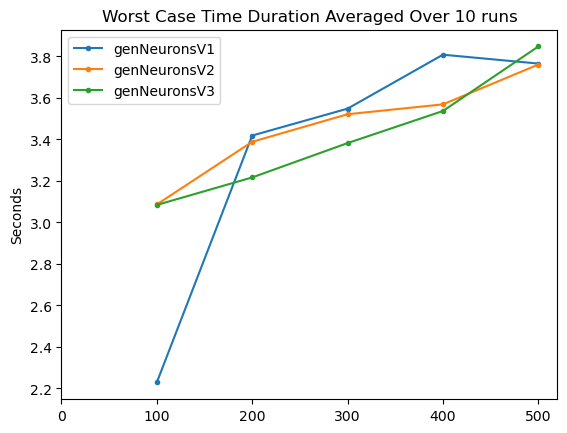

In [14]:
plt.title("Worst Case Time Duration Averaged Over 10 runs")

plt.plot(data[0], data[1], '.-', label="genNeuronsV1")
plt.plot(data[0], data[2], '.-',label="genNeuronsV2")
plt.plot(data[0], data[3], '.-',label="genNeuronsV3")


plt.ylabel("Seconds")
plt.legend()
plt.xticks(np.arange(0, 600, 100))

plt.show()